**9. Write Python code to fit a simple linear regression model using scikit-learn
and print the slope and intercept.**

Actual labels       : [1 0]
Predicted classes   : [1 0]
Predicted probabilities: [1.00000000e+00 1.43849475e-19]
Intercept: [-0.00315055]
Slope: [[33.37445809]]


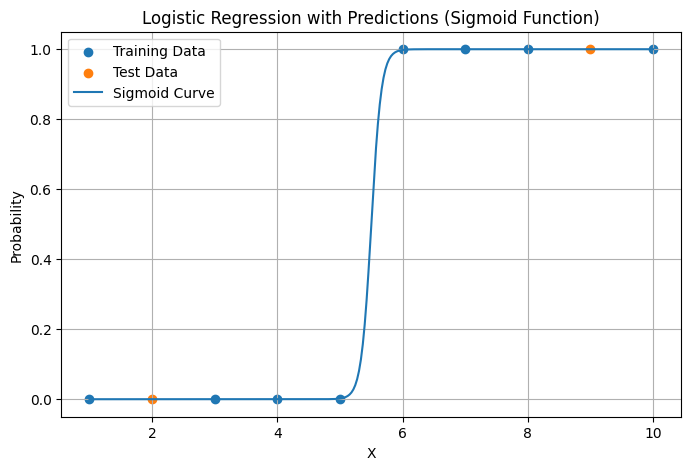

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

X = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1)
y = np.array([0,0,0,0,0,1,1,1,1,1])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty=None, solver="lbfgs")
model.fit(X_train_scaled, y_train)


y_pred_class = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

print("Actual labels       :", y_test)
print("Predicted classes   :", y_pred_class)
print("Predicted probabilities:", y_pred_prob)
print("Intercept:", model.intercept_)
print("Slope:", model.coef_)


X_curve = np.linspace(X.min(), X.max(), 300).reshape(-1,1)
X_curve_scaled = scaler.transform(X_curve)
y_curve = model.predict_proba(X_curve_scaled)[:,1]
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, label="Training Data")
plt.scatter(X_test, y_test, label="Test Data")
plt.plot(X_curve, y_curve, label="Sigmoid Curve")
plt.xlabel("X")
plt.ylabel("Probability")
plt.title("Logistic Regression with Predictions (Sigmoid Function)")
plt.legend()
plt.grid(True)
plt.show()